In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [38]:
alpha = np.random.random()
num_runs = 500
num_episodes = 500
epsilon = 0.1
num_rows = 4
num_cols = 12
num_states = num_rows * num_cols
actions = {0: 'up', 1: 'right', 2: 'down', 3: 'left'}
num_actions = len(actions)
# start_state = num_cols * (num_rows - 1)
# terminal_state = num_states - 1
terminal_state_2d = (num_rows-1, num_cols-1)
start_state_2d = (num_rows - 1, 0)
discount = 1

In [39]:
#Randomly initialising Q
def initializeQ():
    Q = [[0 for i in range(num_actions)] for j in range(num_states)]
    # print(len(Q), len(Q[0]))
    for i in range(num_states):
        if (i == num_rows - 1):
            continue
        for j in range(num_actions):
            Q[i][j] = np.random.random()
    return Q
# Q[45].index(max(Q[45]))

In [40]:
def get_action(state, Q):
    state = state[0]*num_cols + state[1]
    prob = np.random.random()
    if (prob <= epsilon):
        action = np.random.randint(0, num_actions)
    else:
        action = Q[state].index(max(Q[state]))
    return action

def check_cell(s):
    if (s[0] < 0 or s[0] > num_rows - 1 or s[1] < 0 or s[1] > num_cols - 1):
        return False
    return True

def on_cliff(s):
    if (s[0] == num_rows - 1 and 0 < s[1] < num_cols - 1):
        return True
    return False

In [41]:
def take_step(s, action):
    if (action == 0):
        s_dash = (s[0] - 1, s[1])
    elif (action == 1):
        s_dash = (s[0], s[1] + 1)
    elif (action == 2):
        s_dash = (s[0] + 1, s[1])
    else:
        s_dash = (s[0], s[1] - 1)
        
    if (not check_cell(s_dash)):
        return s, -1
    
#     if (s_dash == terminal_state_2d):
#         return s_dash, 50
    
    if (on_cliff(s_dash)):
        return start_state_2d, -100
    return s_dash, -1

In [47]:
def sarsa(num_episodes):
    rewards = [0]*num_episodes
    for episode in range(num_episodes):
        s = start_state_2d
        action = get_action(s, Q)
        while True:
#             print("ss", s)
#             print(s_1d)
            s_dash, reward = take_step(s, action)
            action_dash = get_action(s_dash, Q)
            s_1d = s[0]*num_cols + s[1]
            s_dash_1d = s_dash[0]*num_cols + s_dash[1]
            Q[s_1d][action] += alpha*(reward + discount*Q[s_dash_1d][action_dash] - Q[s_1d][action])
            s = s_dash; action = action_dash;
            rewards[episode] += reward
            if (s == terminal_state_2d):
                break    
        rewards[episode] = max(rewards[episode], -100)

    return rewards

In [43]:
def qlearning(num_episodes):
    rewards = [0]*num_episodes
    for episode in range(num_episodes):
        s = start_state_2d
        while True:
            action = get_action(s, Q)
            s_1d = s[0]*num_cols + s[1]            
            s_dash, reward = take_step(s, action)
            s_dash_1d = s_dash[0]*num_cols + s_dash[1]
            action_dash = get_action(s_dash, Q)
                Q[s_1d][action] += alpha*(reward + discount*max(Q[s_dash_1d]) - Q[s_1d][action])
            s = s_dash;
            rewards[episode] += reward
            if (s == terminal_state_2d):
                break    
        rewards[episode] = max(rewards[episode], -100)
        
    return rewards

In [48]:
rewards_sarsa = np.zeros(num_episodes)
for i in tqdm(range(num_runs)):
    Q = initializeQ()
    rewards_sarsa += np.array(sarsa(num_episodes))
rewards_sarsa/=num_runs

In [45]:
rewards_ql = np.zeros(num_episodes)
for i in tqdm(range(num_runs)):
    Q = initializeQ()
    rewards_ql += np.array(qlearning(num_episodes))
rewards_ql/=num_runs

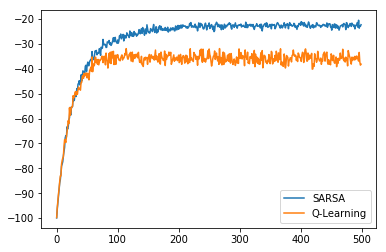

In [51]:
plt.plot(rewards_sarsa, label = "SARSA")
plt.plot(rewards_ql, label = "Q-Learning")
plt.legend()
plt.show()